# Projeto de Análise de dados de um financiamento.

<b>Vamos responder algumas perguntas referente aos dados que temos.
    
1 - Qual a quantidade de clientes que possuem financiamento de cada produto?<br>
2 - Qual o menor valor financiado?<br>
3 - Qual o maior valor financiado?<br>
4 - Qual o cliente que possui a menor idade?<br> 
5 - Qual o cliente que possui a maior idade?<br>    

In [4]:
# A primeira coisa que temos que fazer é importar os pacotes que iremos utilizar.

#Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

#Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

#Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

#Warnings: Possui funções para desativar mensagens de alerta e avisos do Python
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [14]:
#Comando para exibir todas colunas do arquivo

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.

df_original = pd.read_csv("dados.csv", sep = ';', encoding="ISO-8859-1")

In [16]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo

df_original.shape

(343297, 13)

In [28]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
#Se não colocarmos nenhum parâmetro dentro do HEAD(), ele irá mostrar as 5 primeiras linhas. Caso colocarmos algum
#parâmetro, ele irá mostrar o número de linhas que colocamos. 

df_original.head()

,ID_CLIENTE,DATA_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
0,66221,18/06/2021,33,1,120,20000,42.0,MOTOCICLETAS,1,4,0,1,667
1,46982,10/04/2018,1198,39,120,80000,38.0,AUTOMOVEIS,5,0,1,4,0
2,57888,09/10/2020,285,9,120,230000,75.0,CAMINHÕES,5,0,3,2,0
3,51915,25/06/2019,757,25,120,80000,43.0,AUTOMOVEIS,5,0,1,4,0
4,52724,19/09/2019,671,22,120,80000,66.0,AUTOMOVEIS,5,0,5,0,0


In [30]:
#Comando utilizado para verificar as últimas linhas do DataFrame

df_original.tail()

,ID_CLIENTE,DATA_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
343292,29393160,26/01/2018,166,6,120,80000,40.0,AUTOMOVEIS,2,4,0,2,2667
343293,25093062,15/04/2016,176,6,60,80000,46.0,AUTOMOVEIS,2,4,1,1,5333
343294,31101650,30/09/2019,163,6,60,80000,29.0,AUTOMOVEIS,2,3,0,2,4000
343295,26930480,16/01/2015,165,5,120,80000,62.0,AUTOMOVEIS,3,3,0,3,2000
343296,27876161,29/04/2016,154,5,120,80000,25.0,AUTOMOVEIS,3,3,1,2,2000


In [68]:
# Avaliar o período dos dados coletados. Aqui nós utilizamos a função MIN para pegar o menor valor dentro da coluna
# DATA_AQUISICAO e jogamos dentro da variável INICIO. Depois, utilizamos a função MAX e fizemos a mesma coisa, jogando dentro da 
# variável FIM. Depois disso, fizemos um PRINT onde colocamos um texto e chamamos as duas variáveis.

inicio = pd.to_datetime(df_original['DATA_AQUISICAO']).dt.date.min()
fim = pd.to_datetime(df_original['DATA_AQUISICAO']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2015-01-02 Até: 2021-06-29


In [66]:
# Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343297 entries, 0 to 343296
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_CLIENTE             343297 non-null  int64  
 1   DATA_AQUISICAO         343297 non-null  object 
 2   DIAS_ATIVO             343297 non-null  int64  
 3   MESES_ATIVO            343297 non-null  int64  
 4   PRAZO_FINANCIAMENTO    343297 non-null  int64  
 5   VALOR_TABELA           343297 non-null  int64  
 6   IDADE_CLIENTE          343285 non-null  float64
 7   PRODUTO                343297 non-null  object 
 8   QT_PC_PAGAS            343297 non-null  int64  
 9   QT_PC_VENCIDAS         343297 non-null  int64  
 10  QT_PC_PAGA_ATRASO      343297 non-null  int64  
 11  QT_PC_PAGA_EM_DIA      343297 non-null  int64  
 12  VALOR_PARCELAS_ATRASO  343297 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 34.0+ MB


In [40]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
#Aqui podemos verificar que a coluna IDADE_CLIENTE possui 12 valores nulos.

df_original.isnull().sum()

ID_CLIENTE                0
DATA_AQUISICAO            0
DIAS_ATIVO                0
MESES_ATIVO               0
PRAZO_FINANCIAMENTO       0
VALOR_TABELA              0
IDADE_CLIENTE            12
PRODUTO                   0
QT_PC_PAGAS               0
QT_PC_VENCIDAS            0
QT_PC_PAGA_ATRASO         0
QT_PC_PAGA_EM_DIA         0
VALOR_PARCELAS_ATRASO     0
dtype: int64

In [46]:
# Comando utilizado para filtrar todos os dados que possuam valor nulo no campo IDADE_CLIENTE
#jogamos esses registros dentro da variável reg_idade_null

reg_idade_null = df_original[df_original['IDADE_CLIENTE'].isnull()]
reg_idade_null

,ID_CLIENTE,DATA_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
99022,1916725,19/02/2018,1248,41,240,300000,NaN,IMOVEIS,0,0,0,0,0
99023,1916758,19/02/2018,1248,41,240,300000,NaN,IMOVEIS,0,0,0,0,0
99198,1910034,27/07/2018,1090,36,240,300000,NaN,IMOVEIS,0,0,0,0,0
121158,1914991,22/12/2015,161,5,240,300000,NaN,IMOVEIS,0,3,0,0,3750
121389,1896048,25/08/2016,159,5,120,20000,NaN,MOTOCICLETAS,0,3,0,0,500
121415,1881833,03/02/2017,178,5,120,80000,NaN,AUTOMOVEIS,0,3,0,0,2000
121535,1915604,31/08/2017,153,5,240,300000,NaN,IMOVEIS,0,3,0,0,3750
121536,1914815,31/08/2017,153,5,240,300000,NaN,IMOVEIS,0,3,0,0,3750
121662,1914762,03/01/2018,174,5,240,300000,NaN,IMOVEIS,0,1,0,0,1250
121663,1915642,03/01/2018,174,5,240,300000,NaN,IMOVEIS,0,1,0,0,1250


In [56]:
# Média
# Comando utilizado para verificar a média de uma determinada variável, nessa caso utilizamos a variavel DIAS_ATIVO
# Média: É uma medida estatistica onde faz a soma de todos valores do conjunto de dados e divide pela quantidade de dados.

media_dias_ativos = df_original['DIAS_ATIVO'].mean()
media_dias_ativos

520.9413569008759

In [58]:
media_valor_tabela = df_original['VALOR_TABELA'].mean()
media_valor_tabela

106773.61002280824

In [62]:
# Mediana
# Comando utilizado para verificar a Mediana de uma determinada variável
# Mediana: É uma medida estatistica utilizada para visualizar demonstrar o valor do meio dos dados

mediana_dias_ativos = df_original['DIAS_ATIVO'].median()
mediana_dias_ativos

405.0

In [64]:
# Desvio Padrão
# O desvio padrão (standard deviation) é a raiz quadrada da variância. 
# Toda discussão em relação à variância populacional Vs. amostral se aplica, com as devidas mudanças, ao desvio padrão.

std_dias_ativos = df_original['DIAS_ATIVO'].std()
std_dias_ativos

379.7529070566445

In [74]:
# Comando utilizado para fazer uma analise rápida com medidas estatisticas(Média, Mediana, Desvio Padrão, etc)
# lembrando que só iremos fazer o describe em cima de colunas que são números, porque não conseguimos fazer medidas estatisticas
# em cima de variáveis que são textos(strings)
# 25% é o primeiro quartil, 50% é o segundo quartil, 75% é o terceiro quartil e max são todos.

describe_df = df_original.describe()
describe_df

,ID_CLIENTE,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
count,3.432970e+05,343297.000000,343297.000000,343297.000000,343297.000000,343285.000000,343297.000000,343297.000000,343297.000000,343297.000000,343297.000000
mean,1.109177e+08,520.941357,16.968756,111.128277,106773.610023,40.330673,4.090432,0.792643,0.579111,3.511321,711.308485
std,2.173070e+08,379.752907,12.449125,53.600725,83855.559536,12.511816,1.409509,1.337265,0.911053,1.544981,1435.840718
min,2.906000e+03,22.000000,1.000000,36.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.999570e+05,170.000000,5.000000,60.000000,80000.000000,31.000000,3.000000,0.000000,0.000000,2.000000,0.000000
50%,1.935123e+06,405.000000,13.000000,120.000000,80000.000000,39.000000,5.000000,0.000000,0.000000,4.000000,0.000000
75%,2.991064e+07,841.000000,27.000000,120.000000,80000.000000,48.000000,5.000000,2.000000,1.000000,5.000000,1250.000000
max,5.711189e+08,1296.000000,42.000000,240.000000,300000.000000,100.000000,100.000000,11.000000,6.000000,100.000000,41667.000000


In [72]:
# Outra forma de avaliarmos uma variável especifica e exibirmos a informação. 

print('Valor mínimo: ', df_original['DIAS_ATIVO'].min())
print('Valor máximo: ', df_original['DIAS_ATIVO'].max())
print('Valor da média:' , df_original['DIAS_ATIVO'].mean())
print('Valor da médiana:', df_original['DIAS_ATIVO'].median())
print('Valor da Moda:', df_original['DIAS_ATIVO'].mode())

Valor mínimo:  22
Valor máximo:  1296
Valor da média: 520.9413569008759
Valor da médiana: 405.0
Valor da Moda: 0    161
Name: DIAS_ATIVO, dtype: int64


In [78]:
# Comando utilizado para listar somente o nome das colunas

nomes_colunas = df_original.columns
nomes_colunas

Index(['ID_CLIENTE', 'DATA_AQUISICAO', 'DIAS_ATIVO', 'MESES_ATIVO',
       'PRAZO_FINANCIAMENTO', 'VALOR_TABELA', 'IDADE_CLIENTE', 'PRODUTO',
       'QT_PC_PAGAS', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO',
       'QT_PC_PAGA_EM_DIA', 'VALOR_PARCELAS_ATRASO'],
      dtype='object')

In [82]:
# Total de valores únicos de cada variável
#-----------------
# df_original.columns[0:14].tolist() - Pega as primeiras 14 colunas do DataFrame e converte para uma lista de nomes de colunas
#-----------------
# for i in ...: Itera sobre cada nome de coluna na lista criada
#-----------------
# df_original[i].astype(str):Seleciona a coluna atual (i) e converte todos os valores para string 
# (para garantir que a contagem funcione mesmo com tipos mistos)
#-----------------
# .value_counts(): Conta a frequência de cada valor único na coluna. Retorna uma Series onde os índices são os valores únicos 
# e os valores são as contagens
#-----------------
# len(...): Conta quantos valores únicos existem (quantos itens tem na Series retornada por value_counts())
#-----------------
# print(i, ':', ...): Imprime o nome da coluna seguido da contagem de valores únicos
#-----------------
# valores_unicos.append(...): Armazena cada contagem na lista valores_unicos para uso posterior
#-----------------

valores_unicos = []
for i in df_original.columns[0:14].tolist(): 
    print(i, ':', len(df_original[i].astype(str).value_counts())) 
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

ID_CLIENTE : 342336
DATA_AQUISICAO : 1956
DIAS_ATIVO : 1050
MESES_ATIVO : 42
PRAZO_FINANCIAMENTO : 4
VALOR_TABELA : 4
IDADE_CLIENTE : 100
PRODUTO : 4
QT_PC_PAGAS : 31
QT_PC_VENCIDAS : 12
QT_PC_PAGA_ATRASO : 7
QT_PC_PAGA_EM_DIA : 30
VALOR_PARCELAS_ATRASO : 62


In [96]:
# Pergunta 1 - Qual a quantidade de clientes que possuem financiamento de cada produto?
# Podemos adotar dessa forma porque cada cliente só tem apenas 1 financiamento.

df_original.groupby(['PRODUTO']).size()

PRODUTO
AUTOMOVEIS      245218
CAMINHÕES         7156
IMOVEIS          48476
MOTOCICLETAS     42447
dtype: int64

In [90]:
# Pergunta 1 - Outra forma de responder:

df_original['PRODUTO'].value_counts()

PRODUTO
AUTOMOVEIS      245218
IMOVEIS          48476
MOTOCICLETAS     42447
CAMINHÕES         7156
Name: count, dtype: int64

In [92]:
# Pergunta 2 - Qual o menor valor financiado?
# Aqui vamos analisar os valores de todas as tabelas, nesse caso vamos ver o valor da tabela que teve o menos número

df_original.groupby(['VALOR_TABELA']).size()

VALOR_TABELA
20000      42447
80000     245218
230000      7156
300000     48476
dtype: int64

In [94]:
# Também podemos responder a pergunta 2 dessa forma
# Dessa forma, já vai nos mostrar através da função MIN, qual foi o menor valor. 

df_original['VALOR_TABELA'].min()

20000

In [98]:
# Pergunta 3 - Qual o maior valor financiado?
# Nesse caso vamos ver que o maior valor financiado será de 300000

df_original.groupby(['VALOR_TABELA']).size()

VALOR_TABELA
20000      42447
80000     245218
230000      7156
300000     48476
dtype: int64

In [100]:
# Também podemos responder a pergunta 3 dessa forma

df_original['VALOR_TABELA'].max()

300000

In [104]:
# Pergunta 4 - Qual o cliente que possui a menor idade?
# Ao fazemos uma análise mais avançada podemos tratar esse valor como um outlier, que é um valor discrepante. 

df_original['IDADE_CLIENTE'].min()

0.0

In [106]:
# Pergunta 5 - Qual o cliente que possui a maior idade?
# Ao fazemos uma análise mais avançada podemos tratar esse valor como um outlier, que é um valor discrepante. 
df_original['IDADE_CLIENTE'].max()

100.0

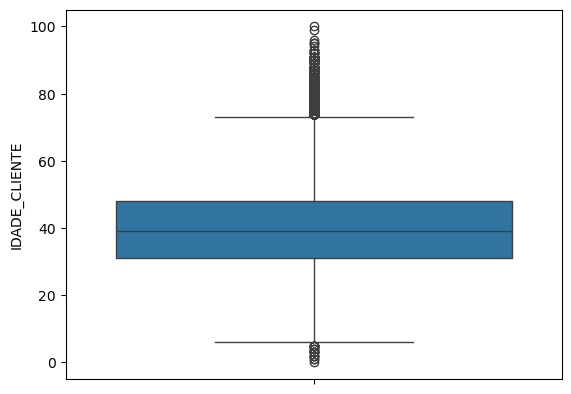

In [110]:
# Exibição de um gráfico de BoxPlot
# Nesse gráfico os valores extremos são os valores mínimos e máximos. 

sns.boxplot(data = df_original, y = "IDADE_CLIENTE")
plt.show()

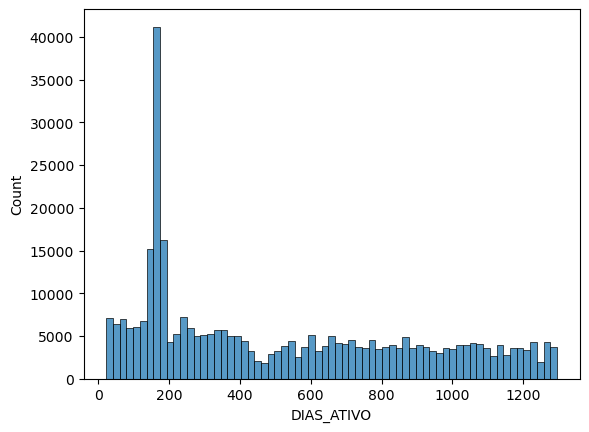

In [112]:
# Exibição de um gráfico de histograma

sns.histplot(data = df_original, x = "DIAS_ATIVO")
plt.show()

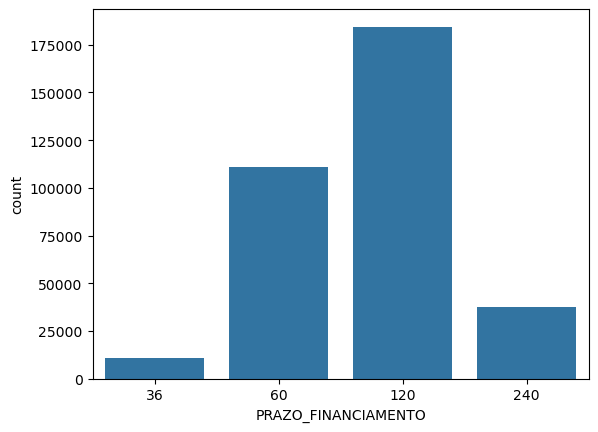

In [120]:
# Gráfico simples para verificarmos a quantidade de financiamentos por prazo

sns.countplot(data = df_original, x = "PRAZO_FINANCIAMENTO")
plt.show()

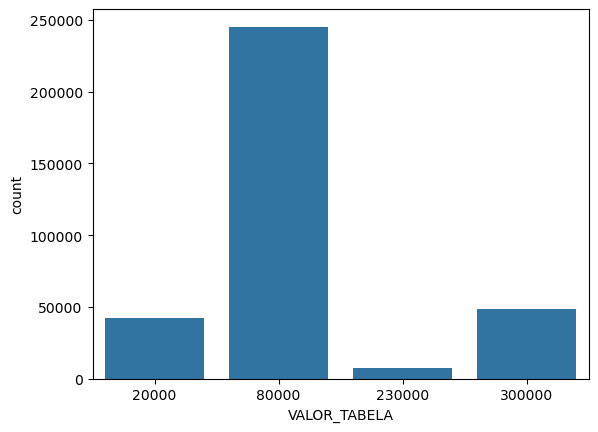

In [122]:
# Gráfico simples para verificarmos a quantidade de financiamentos por valor de tabela

sns.countplot(data = df_original, x = "VALOR_TABELA")
plt.show()

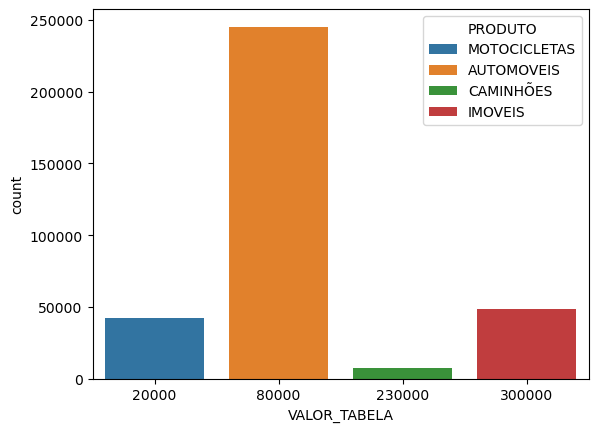

In [124]:
# Também podemos visualizar através do gráfico

sns.countplot(data = df_original, x = "VALOR_TABELA", hue='PRODUTO')
plt.show()